### AN ANALYSIS OF THE TELECOMMUNICATION INDUSTRY

## Business Understanding

The telecommunications industry is inundated with companies that offer electronic communication services that enable the transfer of data like text, speech, audio, or video over the world. They can be classified as wireless carriers, mobile network operators, and satellite providers.

# Business Objectives

1. Determine the number of subscribers that discontinue the services offered by a telecom service provider (Churn rate).

2. Measure the profitability at customer level to determine the average revenue per user(ARPU).

3. Establish the cost of acquiring or upgrading physical assets that support its communication services.

4. Implement strategies that can help grow its customer base or that can lead to an increase in subscription numbers.

# Key Hypothesis

1. Subscribers with higher usage levels are less likely to discontinue services compared to those with lower usage levels.

2. Improving customer response tines will decrease the churn rate.

3. Offering targeted loyalty rewards will reduce churn among long-term customers.

4. Introducing premium service packages will increase the average revenue per user.

5. Customers using bundled services will exhibit a higher ARPU compared to single-service users.

6. Expanding network coverage to underserved areas will grow the customer base

# The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)








## Data Understanding

In [1]:
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

#Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"



In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [4]:
#Query to get the data from the database
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
data.shape

(3000, 21)

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.describe(include='object').columns

Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')

In [9]:
data.describe(include='number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


# Problem
1. The data types of some columns are incorrect. They include; MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.
2. There are null values in various columns.
3. In the MultipleLines and the Churn columns there are three unique values; None, False and True.

# Solution

1. Change the data types of the mentioned columns to boolean
2. Change the values in 'MultipleLines' and 'Churn' to boolean values
3. Fill the missing values in the 'TotalCharges' column with it's mean

In [11]:
data.shape

(3000, 21)

In [12]:
#Lets check for null values

data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
# Check for unique values and duplication
data.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1198
TotalCharges        2893
Churn                  2
dtype: int64

In [14]:
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [15]:
# Check the unique values in the 'MultipleLines' column.

multiplelines_values = data['MultipleLines'].unique()

print(multiplelines_values)

[None False True]


In [16]:
# Replace the 'None' value in the multipleLine column to 'False and also in the Churn column'

# Convert to string, strip, and lower-case safely
data['MultipleLines'] = data['MultipleLines'].astype(str).str.strip().str.lower()

# Replace 'none' with False
data['MultipleLines'] = data['MultipleLines'].replace({'none': False, 'false': False, 'true': True})

# Convert to string, strip, and lower-case safely
data['Churn'] = data['Churn'].astype(str).str.strip().str.lower()

# Replace 'none' with False
data['Churn'] = data['Churn'].replace({'none': False, 'false': False, 'true': True})






In [17]:
#Check the unique values again
multiplelines_values1 = data['MultipleLines'].unique()

print(multiplelines_values1)

[False  True]


In [18]:
# Change data types of some columns to boolean

data['OnlineSecurity'] = data['OnlineSecurity'].astype(bool)
data['OnlineBackup'] = data['OnlineBackup'].astype(bool)
data['DeviceProtection'] = data['DeviceProtection'].astype(bool)
data['TechSupport'] = data['TechSupport'].astype(bool)
data['StreamingTV'] = data['StreamingTV'].astype(bool)
data['StreamingMovies'] = data['StreamingMovies'].astype(bool)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [20]:
#Check for null values again
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [21]:
churn_values = data['Churn']. unique()

print(churn_values)

[False  True]


In [22]:
#fill the missing value in the TotalCharges column with its mean

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [23]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [25]:
data2 = pd.read_csv("C:/Users/MST-PC/Desktop/Data Projects/telecommunication-company/Data/LP2_Telco-churn-second-2000.csv")


In [26]:
data2.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
2034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
2035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
2036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
2037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [27]:
data2.shape

(2043, 21)

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [29]:
data2.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [30]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
data2.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [32]:
data2.describe(include='number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [33]:
#Check the unique values in certain columns
senior_citizen_values = data2['SeniorCitizen'].unique()

print(senior_citizen_values)

[0 1]


In [34]:
partner_values = data2['Partner'].unique()

print(partner_values)

['No' 'Yes']


In [35]:
dependents_values = data2['Dependents'].unique()

print(dependents_values)

['No' 'Yes']


In [36]:
phoneservice_values = data2['PhoneService'].unique()

print(phoneservice_values)

['Yes' 'No']


In [37]:
multiplelines_values2 = data2['MultipleLines'].unique()

print(multiplelines_values2)


['No' 'No phone service' 'Yes']


In [38]:
onlinesecurity_values = data2['OnlineSecurity'].unique()

print(onlinesecurity_values)

['No' 'Yes' 'No internet service']


In [39]:
deviceprotection_values = data2['DeviceProtection'].unique()

print(deviceprotection_values)

['No' 'Yes' 'No internet service']


In [40]:
techsupport_values = data2['TechSupport'].unique()

print(techsupport_values)

['Yes' 'No' 'No internet service']


In [41]:
streamingtv_values = data2['StreamingTV'].unique()

print(streamingtv_values)

['No' 'Yes' 'No internet service']


In [42]:
streamingmovies_values = data2['StreamingMovies'].unique()

print(streamingmovies_values)

['No' 'Yes' 'No internet service']


In [43]:
paperlessbilling_values = data2['PaperlessBilling'].unique()

print(paperlessbilling_values)

['Yes' 'No']


In [44]:
churn_values2 = data2['Churn'].unique()

print(churn_values2)

['No' 'Yes']


In [45]:
data2.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [46]:
# Replace the values in certain columns to boolean values

# Convert to string, strip, and lower-case safely
def clean_columns(dataframe, columns):
    """
    Cleans specified columns in a dataframe by converting them to strings,
    stripping whitespace, and converting to lowercase.
    
    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to clean.

    Returns:
        pd.DataFrame: The dataframe with cleaned columns.
    """
    for column in columns:
        dataframe[column] = dataframe[column].astype(str).str.strip().str.lower()
    return dataframe

# Usage
columns_to_clean = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaperlessBilling', 'Churn'
]

data2 = clean_columns(data2, columns_to_clean)


# Replace 'none' with False
def replace_values_multiple_columns(dataframe, columns, old_values, new_values):
    """
    Replaces specified values in multiple columns of a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of columns to replace values in.
        old_values (list): List of values to replace.
        new_values (list): List of new values to use.

    Returns:
        pd.DataFrame: The dataframe with replaced values.
    """
    replacement_dict = dict(zip(old_values, new_values))
    for column in columns:
        dataframe[column] = dataframe[column].replace(replacement_dict)
    return dataframe

# Usage
columns_to_change = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'Churn']
old_values = ['no', 'yes', 'no phone service', 'no internet service']
new_values = [False, True, False, False]

data2 = replace_values_multiple_columns(data2, columns_to_change, old_values, new_values)



# Convert to boolean
def convert_to_boolean(dataframe, columns):
    """
    Converts specified columns in a dataframe to boolean values.
    
    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to convert.

    Returns:
        pd.DataFrame: The dataframe with converted columns.
    """
    for column in columns:
        dataframe[column] = dataframe[column].astype(bool)
    return dataframe

# Usage
columns_to_convert = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'Churn'
]
data2 = convert_to_boolean(data2, columns_to_convert)

In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   bool   
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   bool   
 10  OnlineBackup      2043 non-null   bool   
 11  DeviceProtection  2043 non-null   bool   
 12  TechSupport       2043 non-null   bool   
 13  StreamingTV       2043 non-null   bool   
 14  StreamingMovies   2043 non-null   bool   
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   bool   


In [48]:
# Change data type of TotalCharges column to float

data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')


In [49]:
#Check for null values
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [50]:
# Fill null values with mean

data2['TotalCharges'] = data2['TotalCharges'].fillna(data2['TotalCharges'].mean())

In [51]:
# Check for duplicates
data2.duplicated().sum()

np.int64(0)

In [52]:
# Change the data type of the SeniorCitizen column to boolean

data2['SeniorCitizen'] = data2['SeniorCitizen'].astype(bool)

In [53]:
# Check unique values in the OnlineBackup column

onlinebackup_values = data2['OnlineBackup'].unique()
print(onlinebackup_values)

[False  True]


In [54]:
data3 = pd.read_excel("C:/Users/MST-PC/Desktop/Data Projects/telecommunication-company/Data/Telco-churn-last-2000.xlsx")

In [55]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [56]:
data3.shape

(2000, 20)

In [57]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [58]:
# Replace the values in certain columns to boolean values

# Convert to string, strip, and lower-case safely
def clean_columns(dataframe, columns):
    """
    Cleans specified columns in a dataframe by converting them to strings,
    stripping whitespace, and converting to lowercase.
    
    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to clean.

    Returns:
        pd.DataFrame: The dataframe with cleaned columns.
    """
    for column in columns:
        dataframe[column] = dataframe[column].astype(str).str.strip().str.lower()
    return dataframe

# Usage
columns_to_clean = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaperlessBilling'
]

data3 = clean_columns(data3, columns_to_clean)


# Replace 'none' with False
def replace_values_multiple_columns(dataframe, columns, old_values, new_values):
    """
    Replaces specified values in multiple columns of a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of columns to replace values in.
        old_values (list): List of values to replace.
        new_values (list): List of new values to use.

    Returns:
        pd.DataFrame: The dataframe with replaced values.
    """
    replacement_dict = dict(zip(old_values, new_values))
    for column in columns:
        dataframe[column] = dataframe[column].replace(replacement_dict)
    return dataframe

# Usage
columns_to_change = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
old_values = ['no', 'yes', 'no phone service', 'no internet service']
new_values = [False, True, False, False]

data3 = replace_values_multiple_columns(data3, columns_to_change, old_values, new_values)



# Convert to boolean
def convert_to_boolean(dataframe, columns):
    """
    Converts specified columns in a dataframe to boolean values.
    
    Args:
        dataframe (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to convert.

    Returns:
        pd.DataFrame: The dataframe with converted columns.
    """
    for column in columns:
        dataframe[column] = dataframe[column].astype(bool)
    return dataframe

# Usage
columns_to_convert = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
]
data3 = convert_to_boolean(data3, columns_to_convert)

In [59]:
# Change data type of TotalCharges column to float

data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'], errors='coerce')

In [60]:
#Check for null values
data3.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [61]:
# Fill null values with mean

data3['TotalCharges'] = data3['TotalCharges'].fillna(data3['TotalCharges'].mean())

In [62]:
# Check for duplicates

data3.duplicated().sum()

np.int64(0)

## EDA

In [63]:
# Join the two dataframes, data and data2 into a single dataframe

data_combined = pd.concat([data, data2], axis=0)

In [65]:
# Check the number of rows and columns in the combined dataframe
data_combined.shape

(5043, 21)

In [66]:
data_combined.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [67]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   bool   
 4   Dependents        5043 non-null   bool   
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   bool   
 7   MultipleLines     5043 non-null   bool   
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   bool   
 10  OnlineBackup      5043 non-null   bool   
 11  DeviceProtection  5043 non-null   bool   
 12  TechSupport       5043 non-null   bool   
 13  StreamingTV       5043 non-null   bool   
 14  StreamingMovies   5043 non-null   bool   
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   bool   
 17  

In [68]:
#Check for null values
data_combined.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
#Check for duplicates

data_combined.duplicated().sum()

np.int64(0)

In [77]:
# drop the customerID column

data_combined.drop('customerID', axis=1, inplace=True)

In [83]:
# replace the values in internet service column with uniform variables

data_combined['InternetService'] = data_combined['InternetService'].replace({'dsl': 'DSL', 'fiber optic': 'Fiber optic', 'no': 'No'})

In [84]:
# Conduct exploratory data analysis

# conduct simple general analysis of the data

data_combined.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000
mean,32.576641,65.090214,2302.062768
std,24.529807,30.068133,2267.682399
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,418.000000
50%,29.000000,70.550003,1406.000000
75%,56.000000,90.050003,3857.575073
max,72.000000,118.650002,8670.100000


# From the ststistics summary we can find that;

1. The average tenure or period of subscription is 32 days. Although all subscription are monthly an extension is allowed to cater for renewals.
2. The maximum tenure is 72 and minimum 0, showing that users have an option to pay there subscription quarterly.


In [96]:
# lets separate data_combined into numerical and categorical columns

numerical_columns = data_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data_combined.select_dtypes(include=['object', 'bool']).columns.tolist()
print(numerical_columns)

['tenure', 'MonthlyCharges', 'TotalCharges']


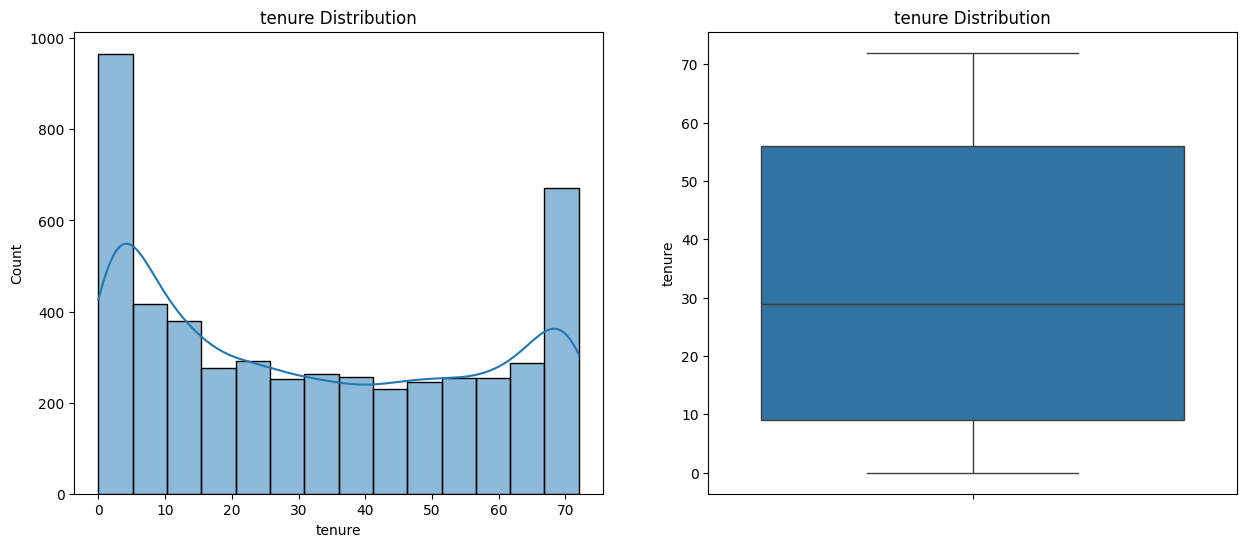

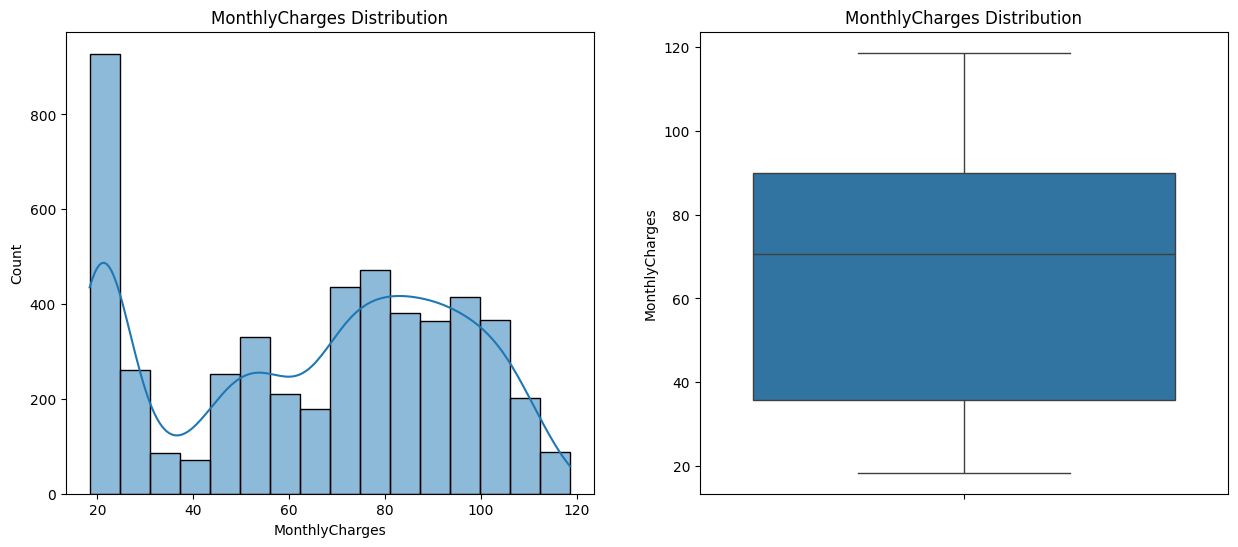

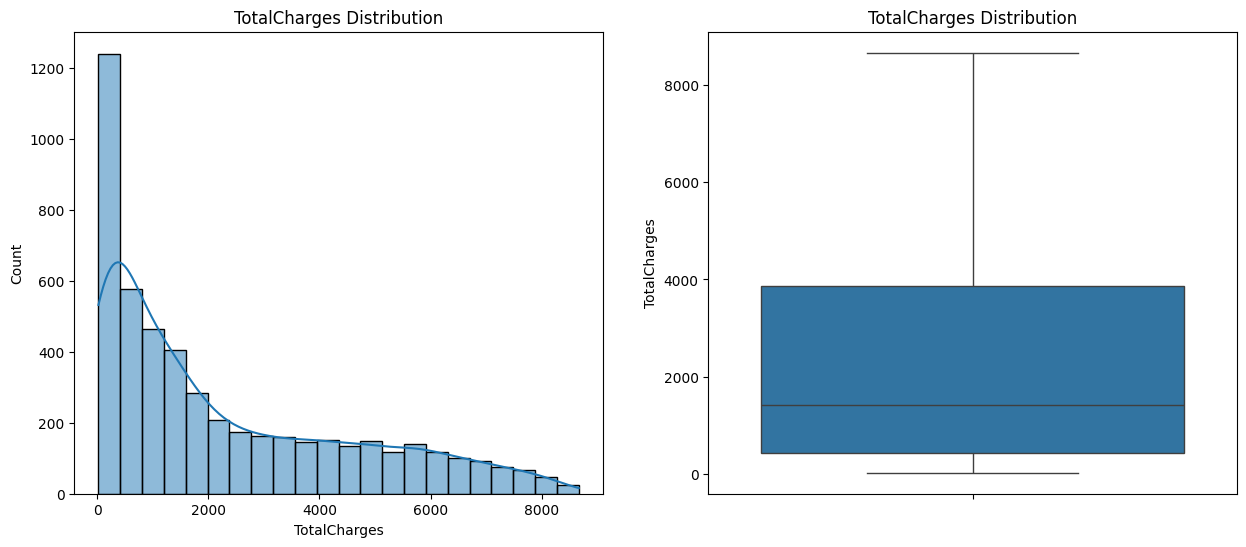

In [97]:
# Conduct univariate analysis of the numerical columns including histogram and boxplot

def univariate_analysis(dataframe, numerical_columns):
    """
    Conducts univariate analysis of numerical columns in a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to analyze.
        numerical_columns (list): List of numerical column names to analyze.
    """
    for column in numerical_columns:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'{column} Distribution')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[column])
        plt.title(f'{column} Distribution')

        plt.show()

# Usage
univariate_analysis(data_combined, numerical_columns)



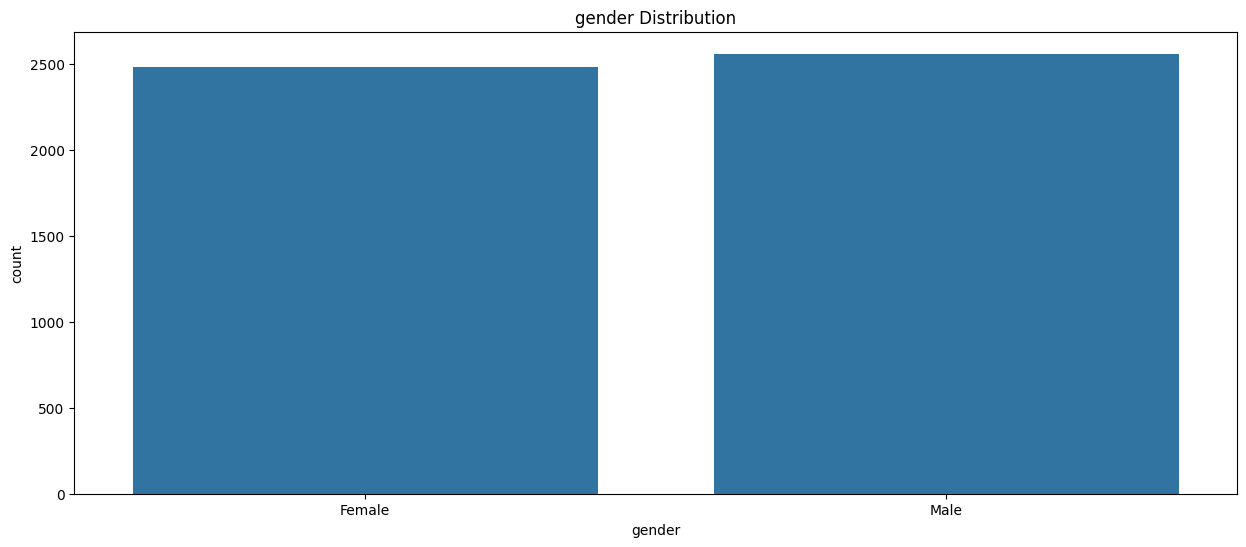

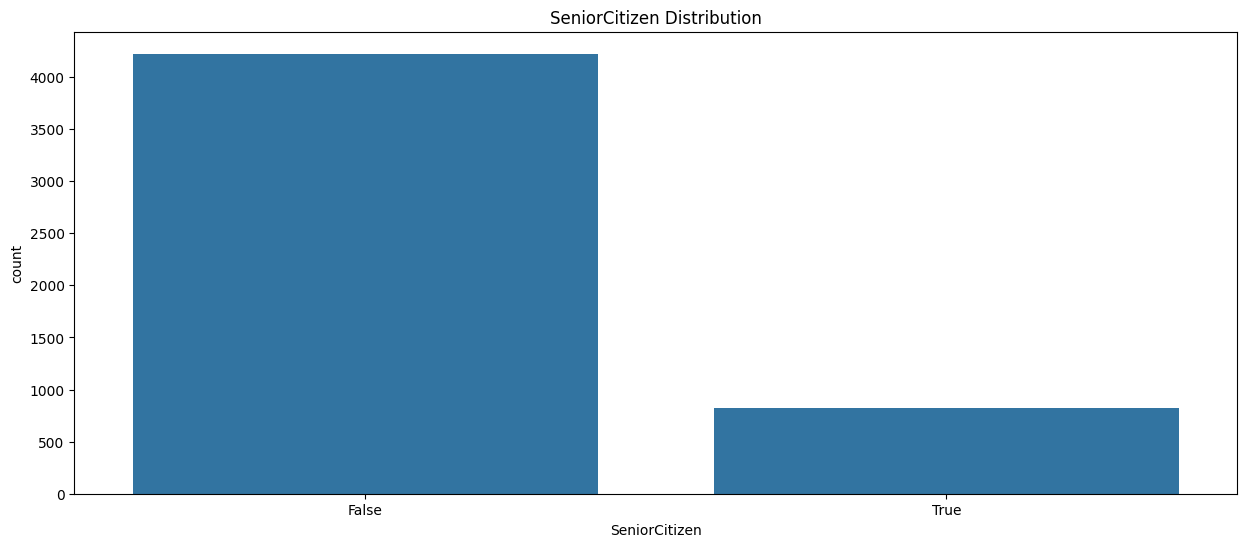

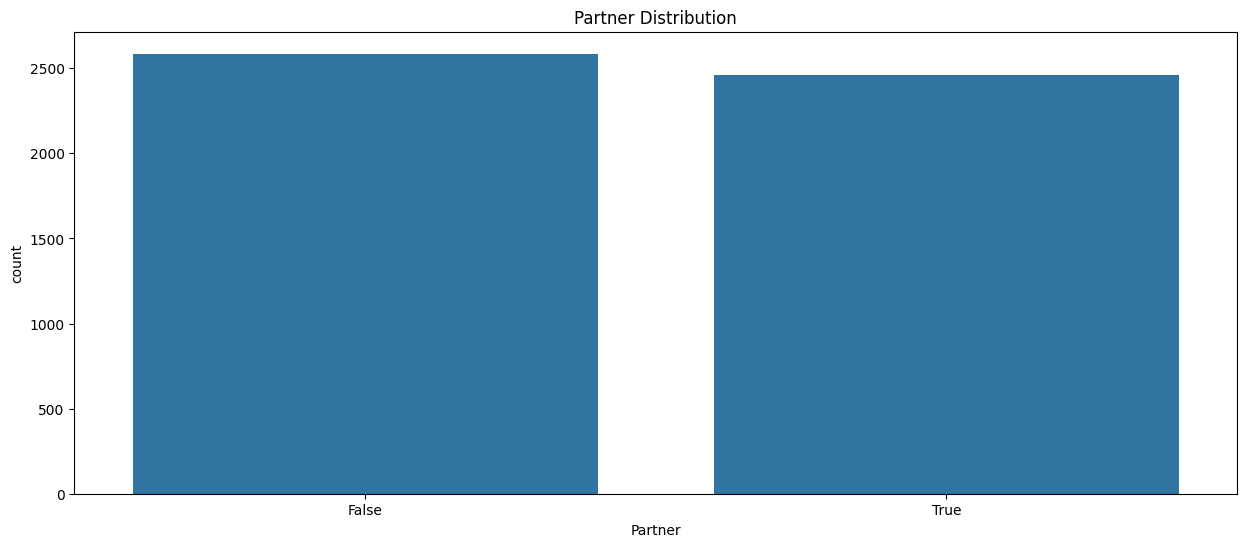

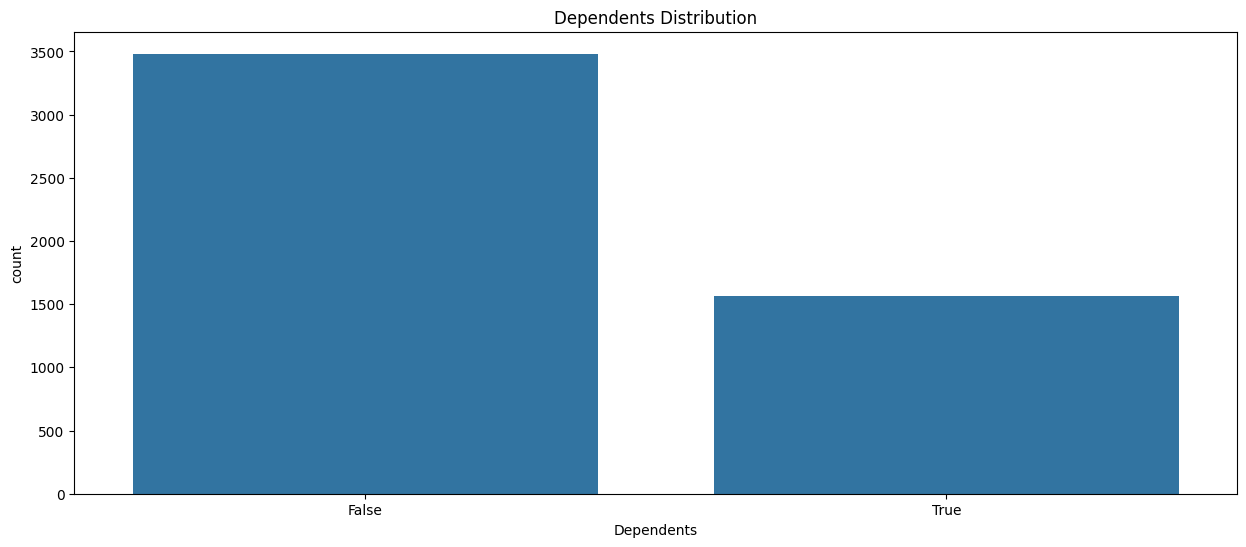

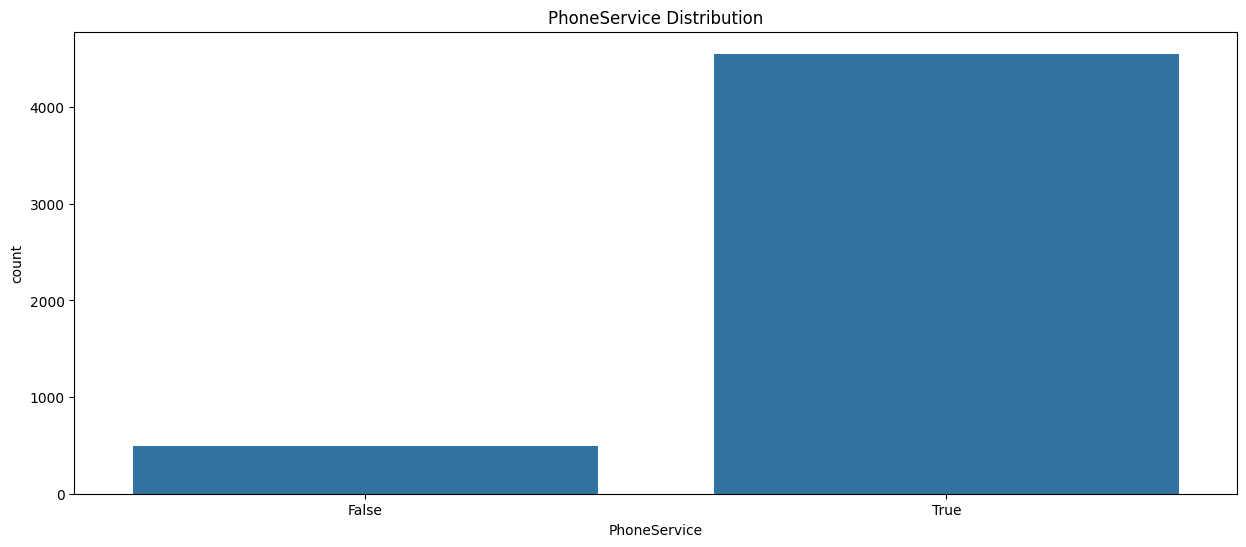

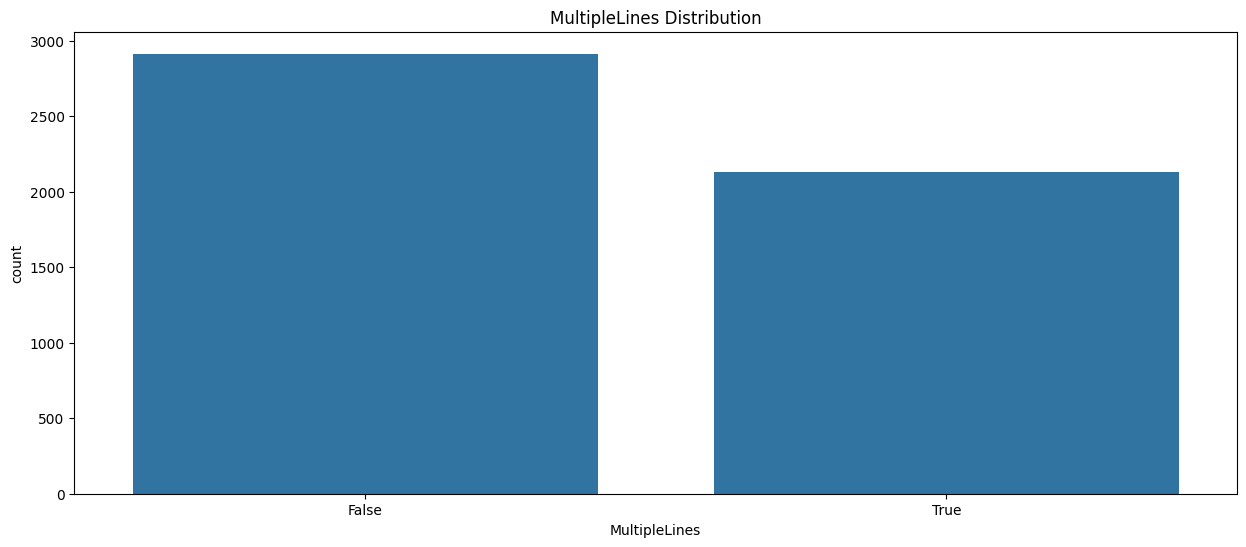

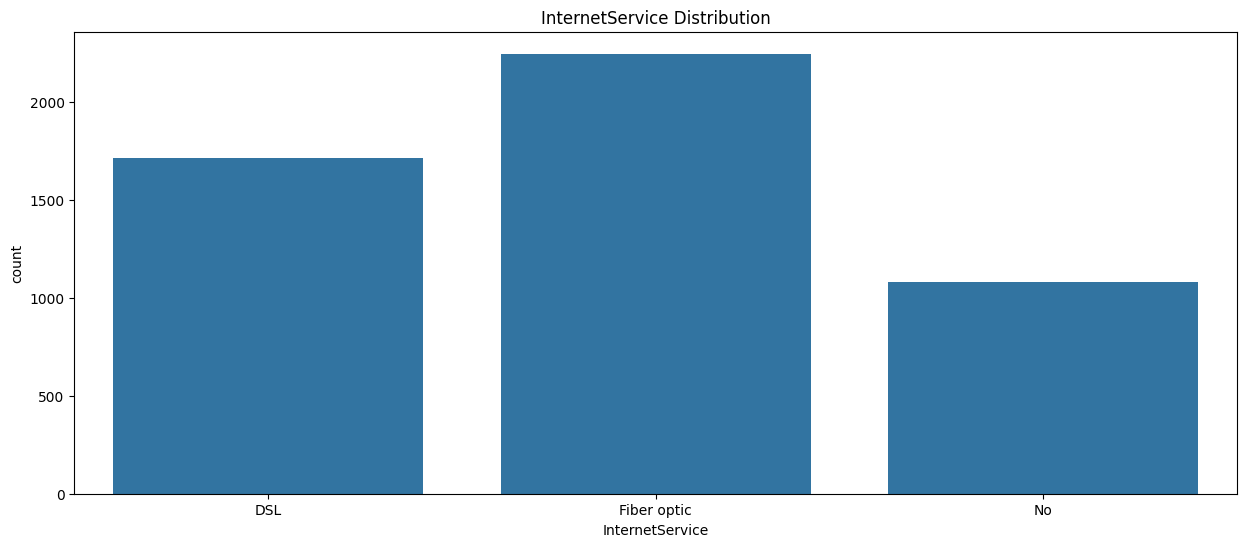

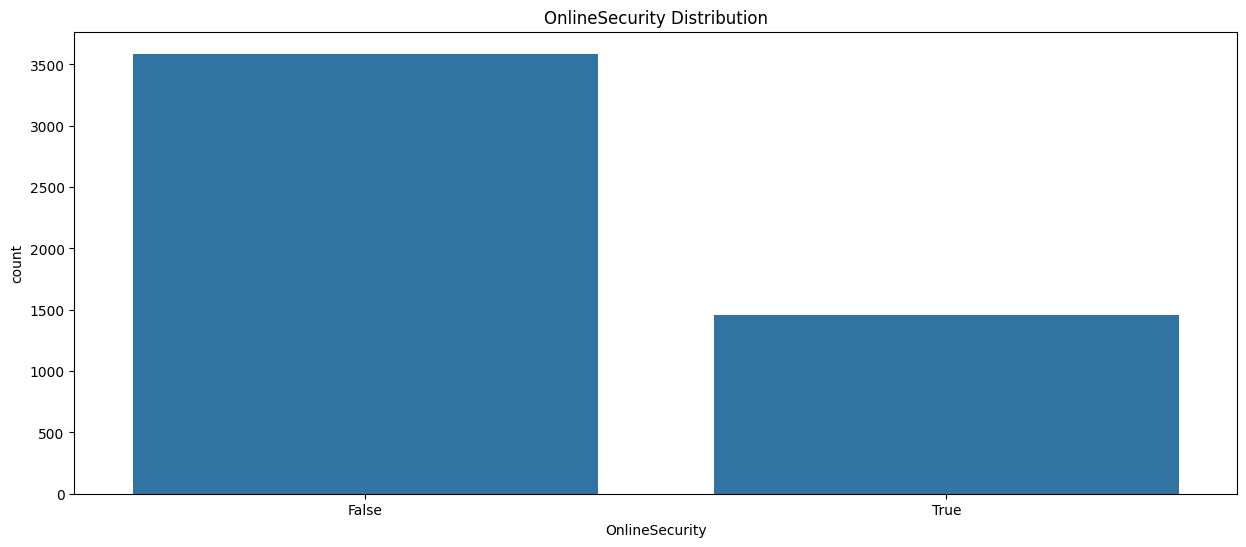

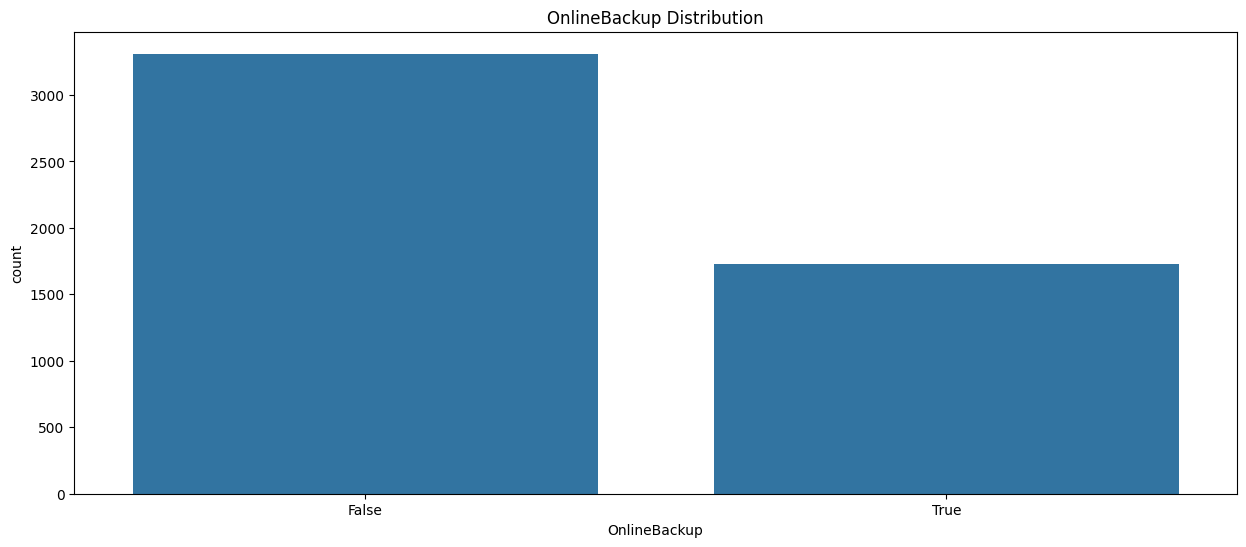

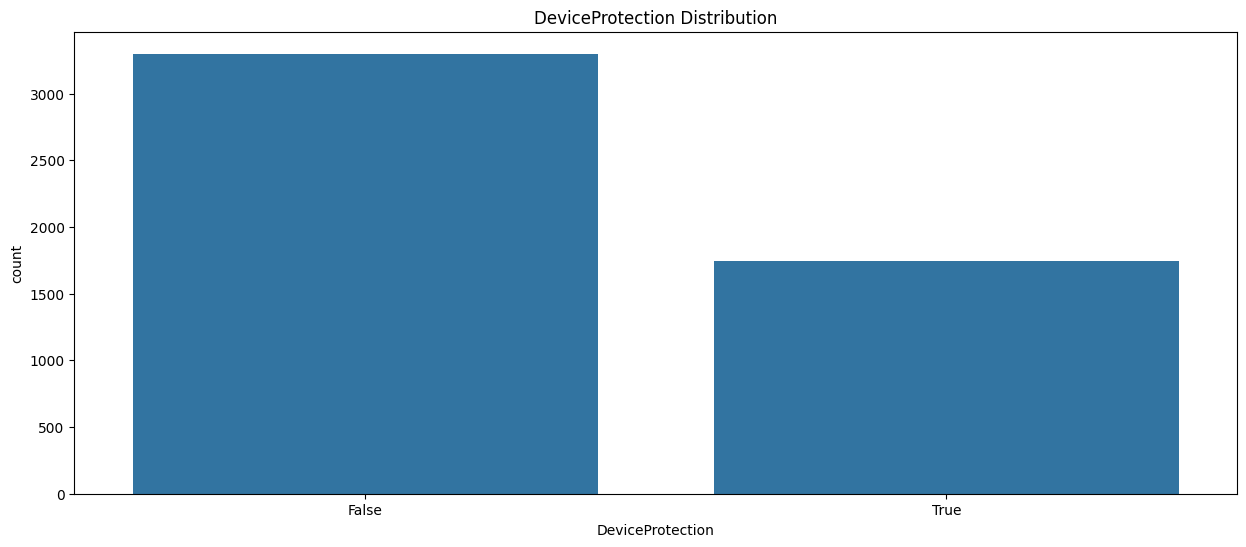

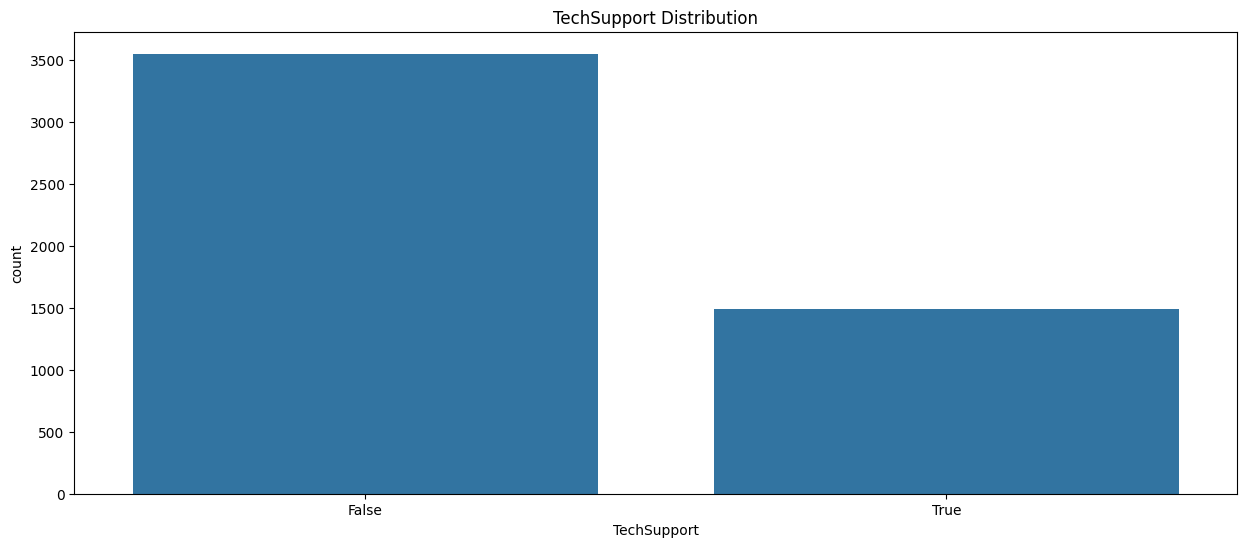

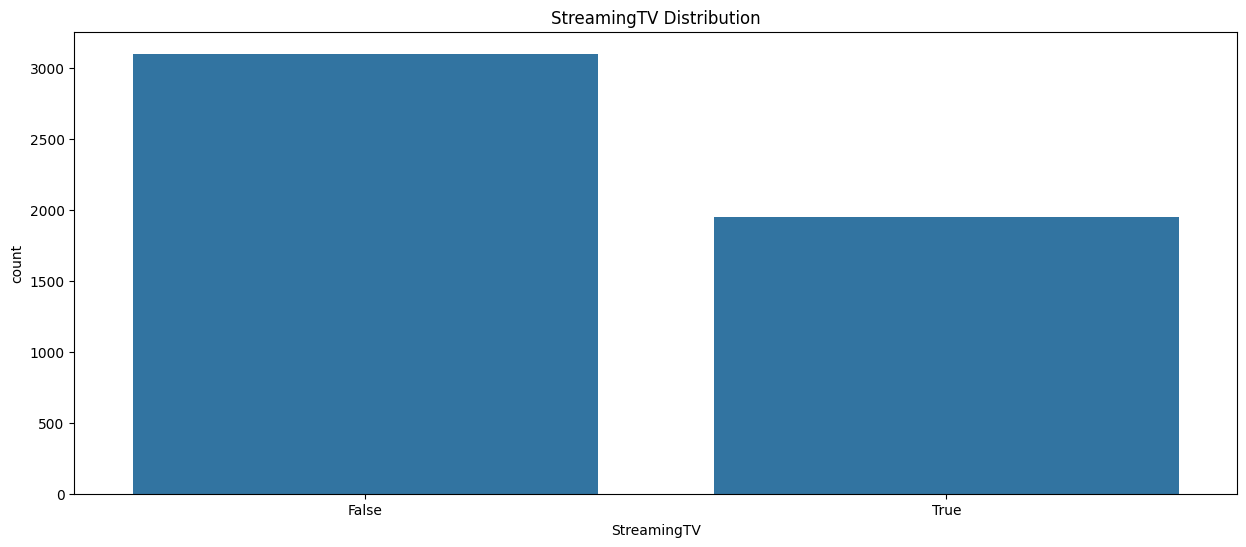

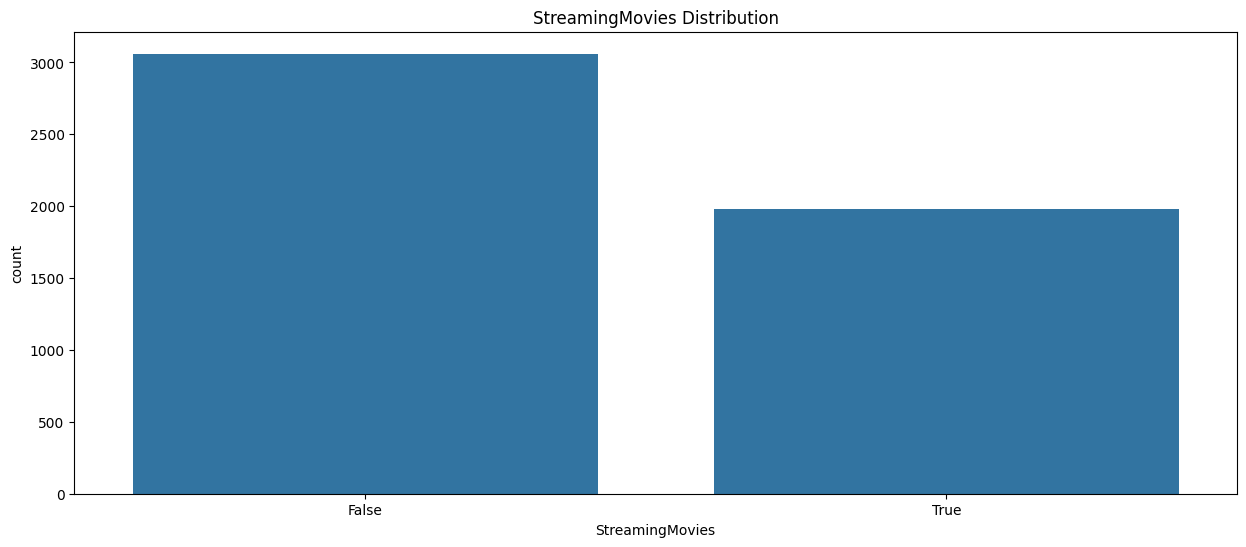

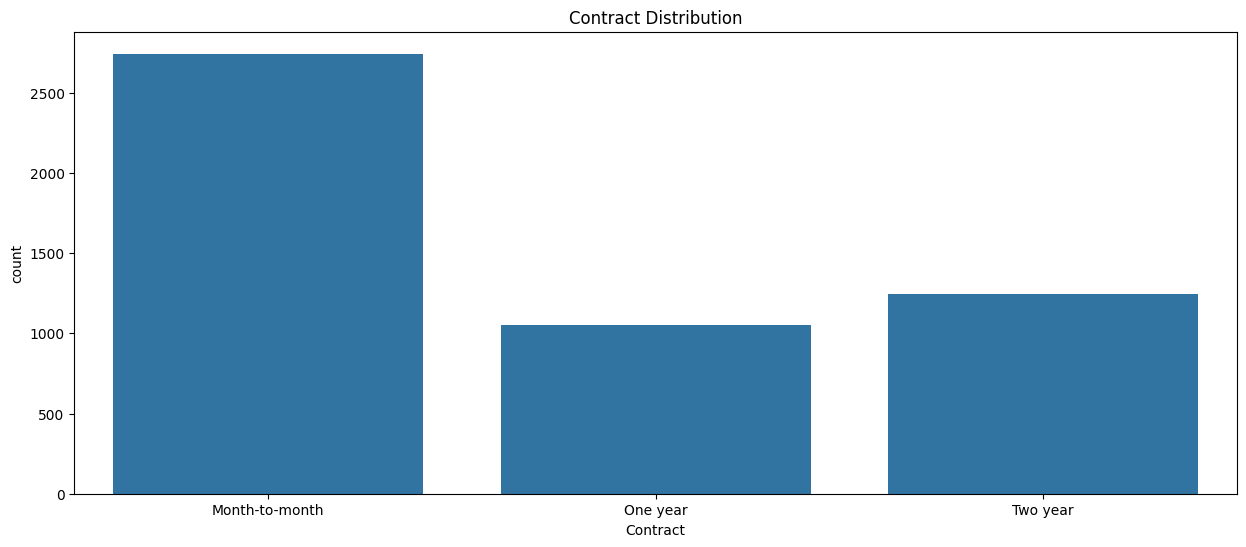

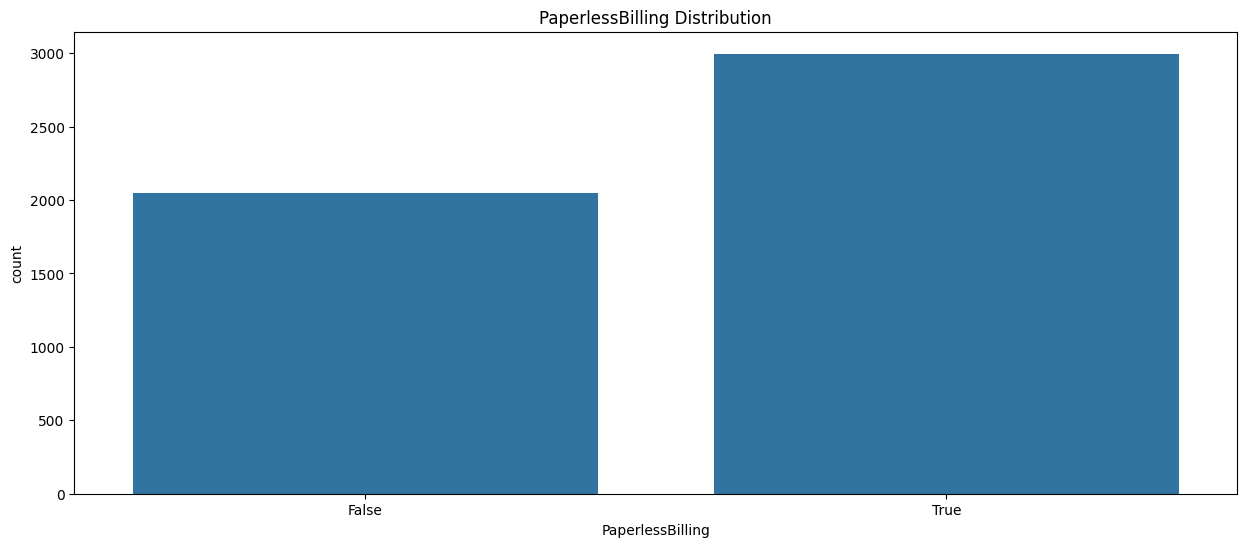

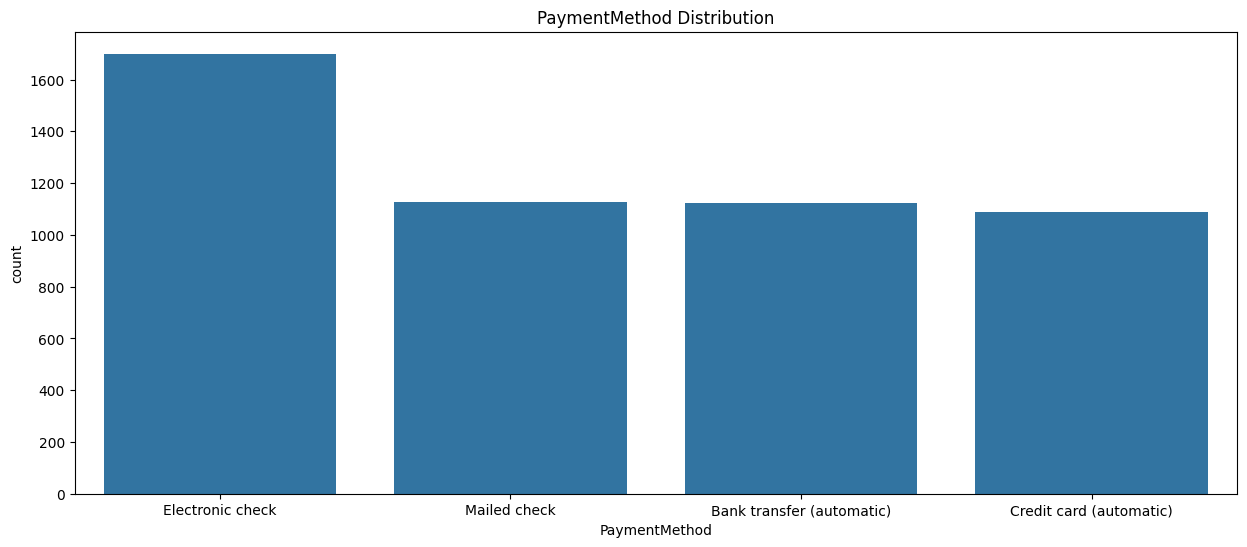

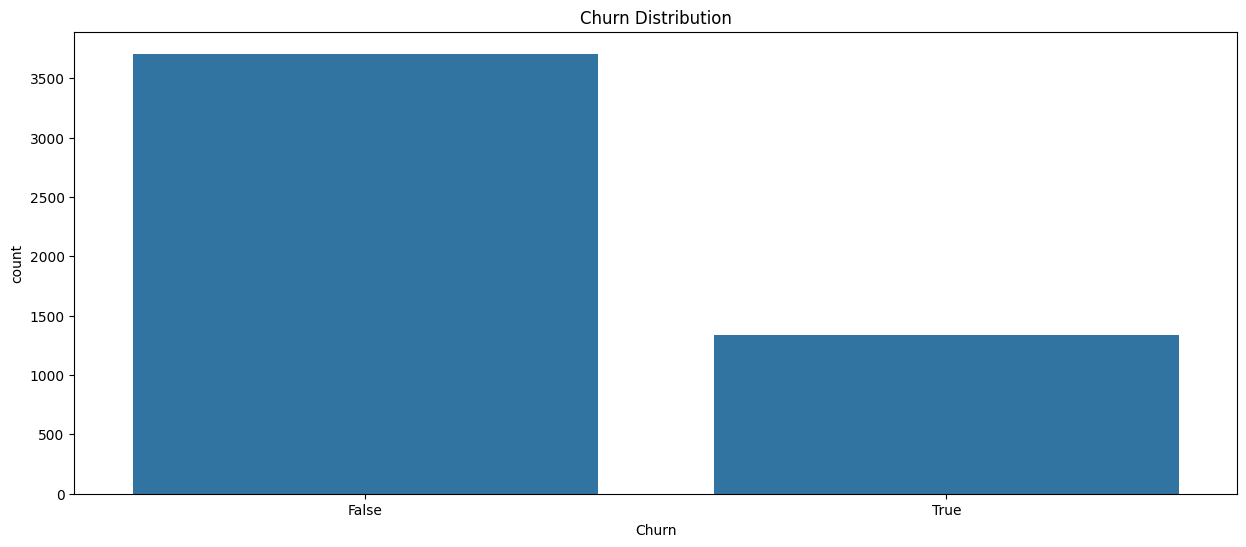

In [98]:
# conduct univariate analysis of the categorical columns

# create a countplot for all categorical columns in the dataset

def countplot_analysis(dataframe, categorical_columns):
    """
    Conducts countplot analysis of categorical columns in a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to analyze.
        categorical_columns (list): List of categorical column names to analyze.
    """
    for column in categorical_columns:
        plt.figure(figsize=(15, 6))
        sns.countplot(data=dataframe, x=column)
        plt.title(f'{column} Distribution')
        plt.show()

# Usage
countplot_analysis(data_combined, categorical_columns)        

# Findings

1. The number of males and females in the dataset is approximately equal, with an average of over 2000.
2. The most popular internet service provider is fiber optics, followed by DSL.
3. The majority of clients prefer a month-to-month membership, with a one-year subscription being the most popular.
4. A high number of clients choose electronic checks as payment methods, with the remainder preferring mailed checks, bank transfers, and credit cards (automatic).
5. 16% of clientele are older adults, and half have partners.
6. Approximately 30% of consumers have dependents.
7. 90% of clients have phone service, and 42% have several lines.
8. Approximately 72% of consumers lack online security, backups, device protection tools, and technical help.
9. 38% of people choose to view their favourite television series and movies via streaming services or channels.



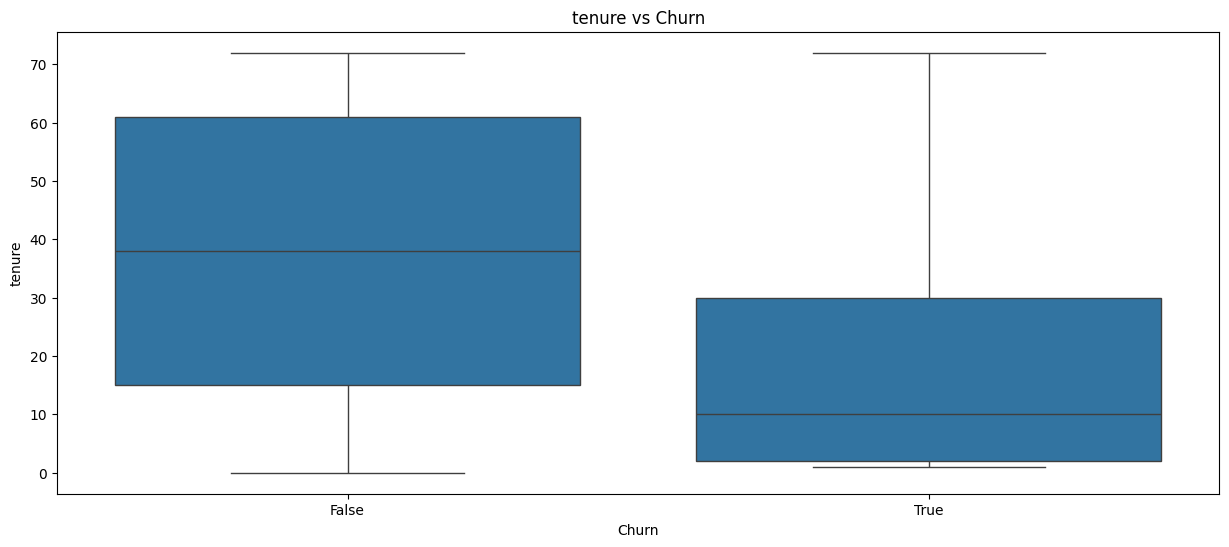

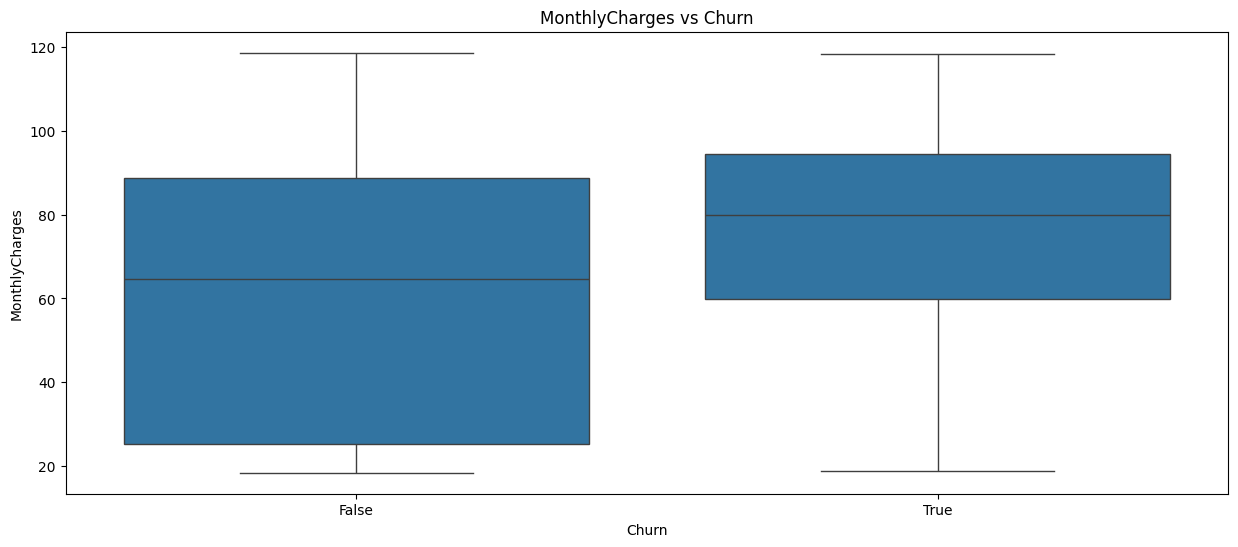

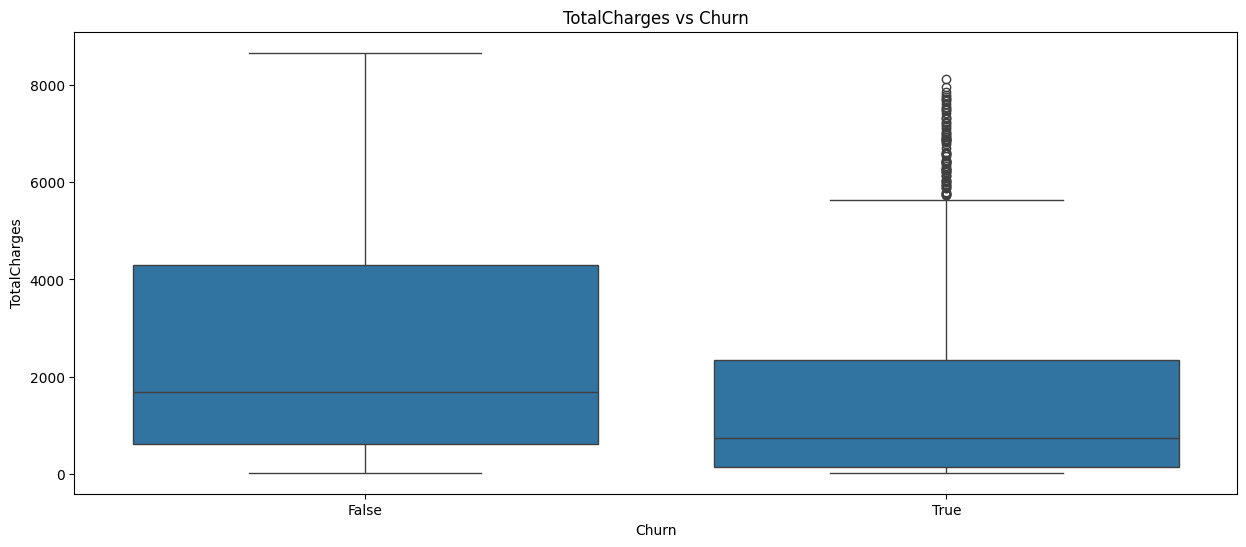

In [92]:
# conduct a bivariate analysis of the numerical columns
def boxplot_analysis(dataframe, numerical_columns):
    """
    Conducts boxplot analysis of numerical columns in a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to analyze.
        numerical_columns (list): List of numerical column names to analyze.
    """
    for column in numerical_columns:
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=dataframe, x='Churn', y=column)
        plt.title(f'{column} vs Churn')
        plt.show()

# Usage
boxplot_analysis(data_combined, numerical_columns)


# Findings

1. There is a negative relationship between tenure and churn illustrating that more client tend to cancel there subscriptions after staying with the company for a shorter period.
2. Monthly charges has a positive correlation with the churn rate indicating a negative reaction to high monthly charges.
3. there are outliers in the totalcharges column.

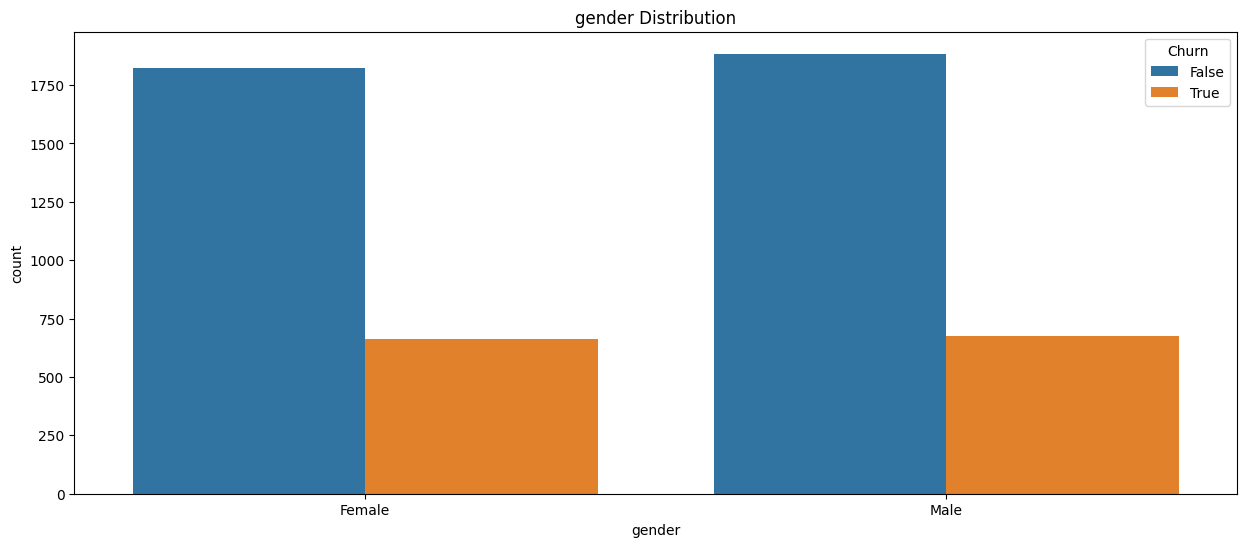

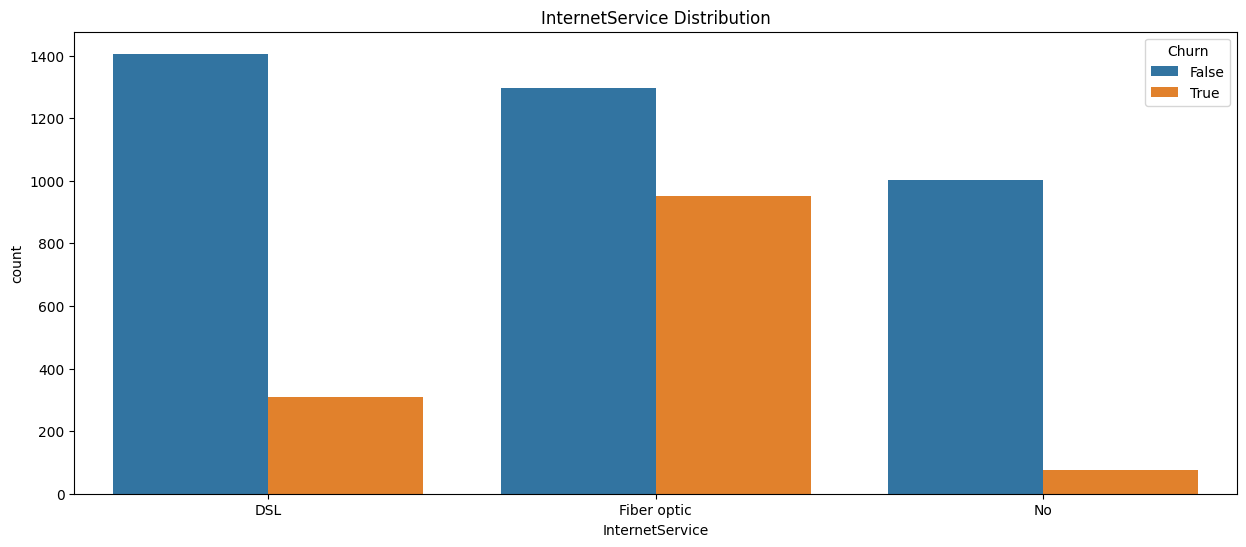

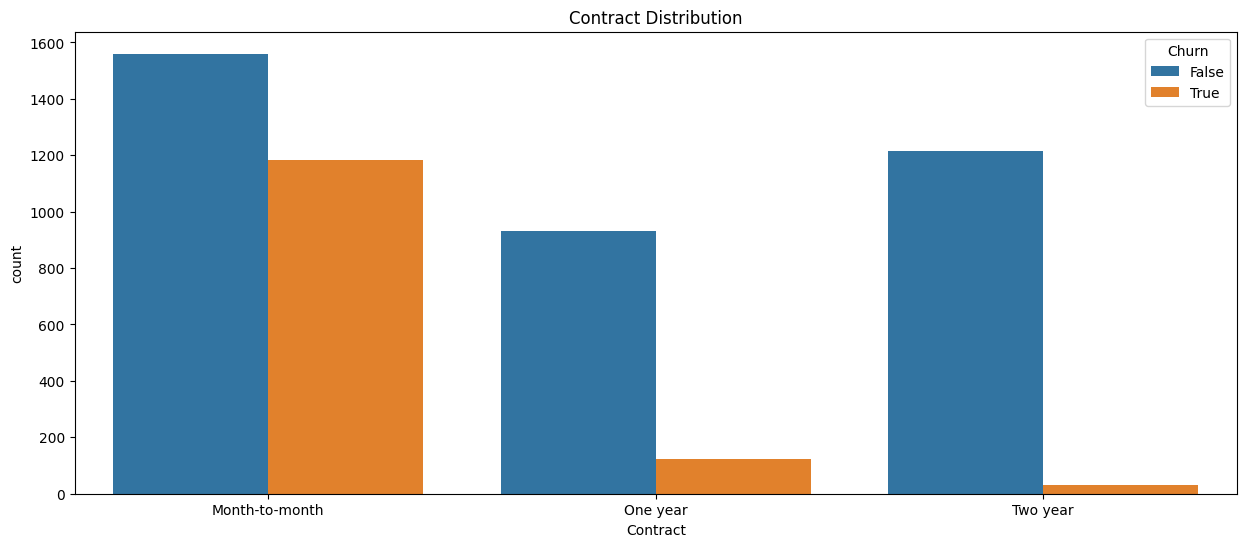

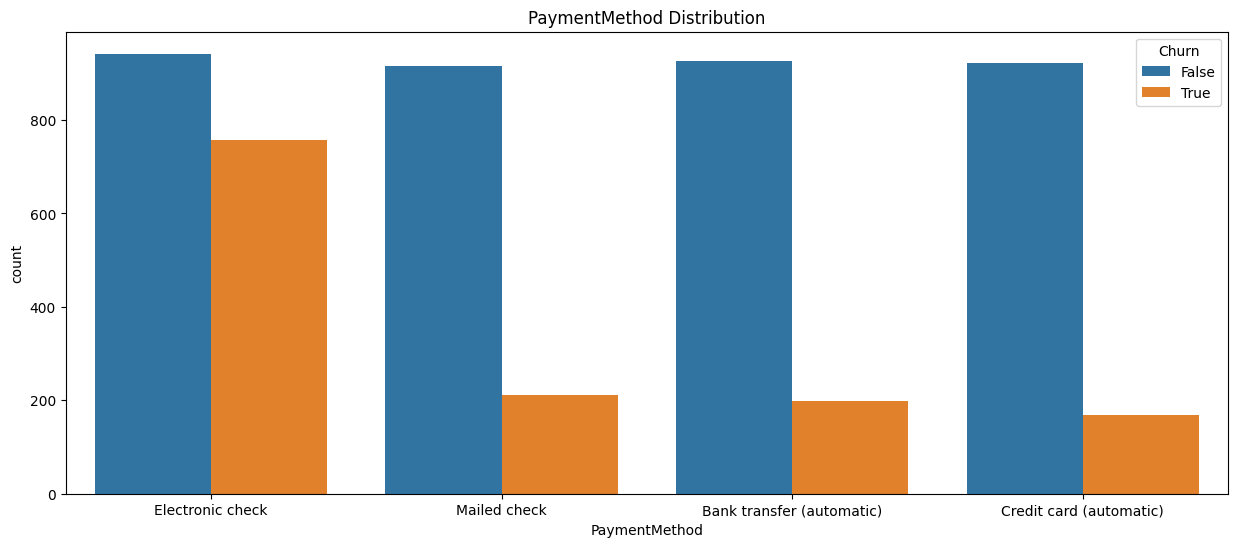

In [93]:
# conduct a bivariate analysis of the categorical columns

def countplot_analysis(dataframe, categorical_columns):
    """
    Conducts countplot analysis of categorical columns in a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe to analyze.
        categorical_columns (list): List of categorical column names to analyze.
    """
    for column in categorical_columns:
        plt.figure(figsize=(15, 6))
        sns.countplot(data=dataframe, x=column, hue='Churn')
        plt.title(f'{column} Distribution')
        plt.show()

# Usage
countplot_analysis(data_combined, categorical_columns)

# findings

1. Their is an equal number of users both male and female who leave the company.
2. A large percentage of people who cancel there subscription with the company use fibre optics as there internet service provider.
3. loyal customers are those that have with two year contracts with the company.
4. Most customers who leave have month-on-month contracts and use electronic checks as a mode of payments.

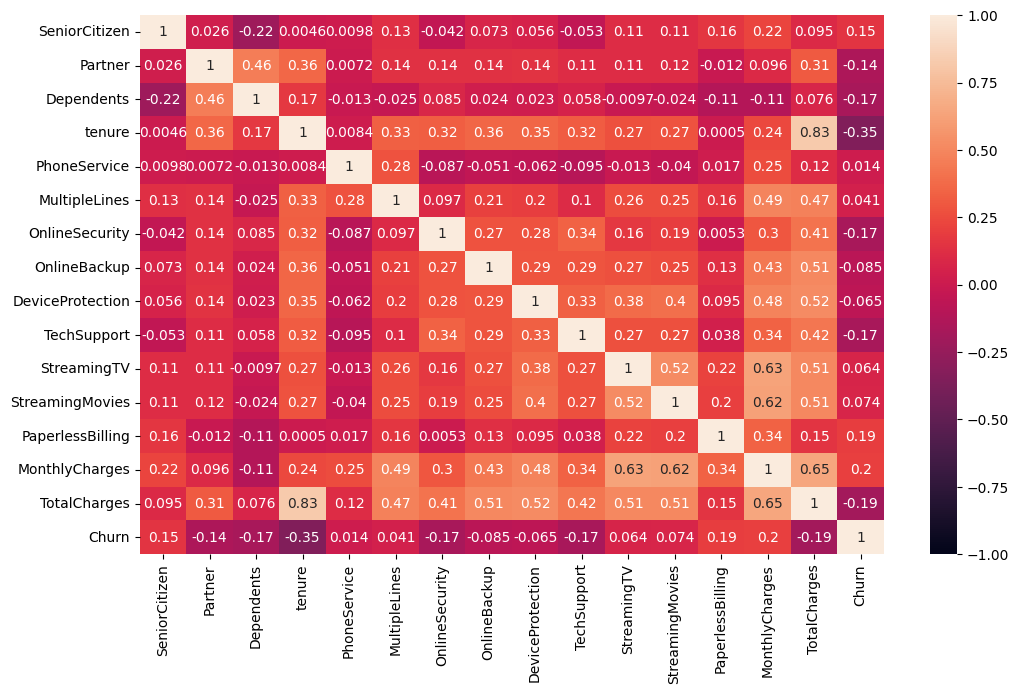

In [95]:
# Conduct a multivariate analysis of the data

# Create a correlation matrix of all the columns in the dataset

plt.figure(figsize=(12, 7))
sns.heatmap(data_combined.drop(['gender','InternetService', 'Contract', 'PaymentMethod'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()
